# Predict number of upvotes

## Problem Statement

An online question and answer platform has hired you as a data scientist to identify the best question authors on the platform. This identification will bring more insight into increasing the user engagement. Given the tag of the question, number of views received, number of answers, username and reputation of the question author, the problem requires you to predict the upvote count that the question will receive.

## Data Dictionary

#### ID-	Question ID,
#### Tag-	Anonymised tags representing question category,
#### Reputation-	Reputation score of question author,
#### Answers-	Number of times question has been answered,
#### Username-	Anonymised user id of question author,
#### Views-	Number of times question has been viewed,
### Upvotes	(Target)- Number of upvotes for the question

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("test_8i3B3FC.csv")

In [3]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [4]:
df.shape

(141448, 6)

In [5]:
df.Reputation.value_counts()

0.0        2821
1.0         452
16.0        446
21.0        417
6.0         406
11.0        397
23.0        386
13.0        376
18.0        368
31.0        351
26.0        347
38.0        316
36.0        312
33.0        311
8.0         303
28.0        302
41.0        278
51.0        277
46.0        271
61.0        269
48.0        264
43.0        259
53.0        256
58.0        246
56.0        239
66.0        236
68.0        235
3.0         232
71.0        227
63.0        215
           ... 
73692.0       1
13307.0       1
2872.0        1
13616.0       1
22265.0       1
18419.0       1
5821.0        1
6340.0        1
36836.0       1
13725.0       1
36833.0       1
5325.0        1
44534.0       1
9207.0        1
36797.0       1
4881.0        1
6223.0        1
53207.0       1
10130.0       1
31520.0       1
44188.0       1
36814.0       1
6629.0        1
7121.0        1
18401.0       1
8121.0        1
30477.0       1
14926.0       1
11145.0       1
12082.0       1
Name: Reputation, Length

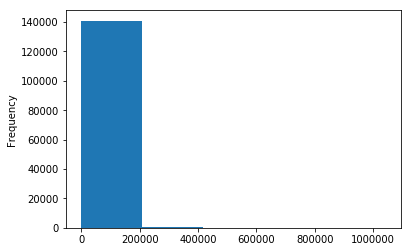

In [6]:
df.Reputation.plot.hist(bins=5)

In [7]:
df.Upvotes.plot.hist(bins=12)

AttributeError: 'DataFrame' object has no attribute 'Upvotes'

In [ ]:
df["Upvotes"].value_counts().argsort()

In [ ]:
len(df["Upvotes"].value_counts().unique())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141448 entries, 0 to 141447
Data columns (total 6 columns):
ID            141448 non-null int64
Tag           141448 non-null object
Reputation    141448 non-null float64
Answers       141448 non-null float64
Username      141448 non-null int64
Views         141448 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 6.5+ MB


In [9]:
df.describe()

,ID,Reputation,Answers,Username,Views
count,141448.000000,1.414480e+05,141448.000000,141448.000000,1.414480e+05
mean,235743.073497,7.920927e+03,3.914873,81348.231117,2.984633e+04
std,136269.867118,2.791072e+04,3.577460,49046.098215,8.034374e+04
min,7.000000,0.000000e+00,0.000000,4.000000,9.000000e+00
25%,117797.000000,2.860000e+02,2.000000,40222.750000,2.608000e+03
50%,235830.000000,1.245000e+03,3.000000,78795.500000,8.977000e+03
75%,353616.000000,5.123000e+03,5.000000,122149.000000,2.698925e+04
max,471488.000000,1.042428e+06,73.000000,175737.000000,5.004669e+06


In [10]:
df.Reputation.describe()//1

count     141448.0
mean        7920.0
std        27910.0
min            0.0
25%          286.0
50%         1245.0
75%         5123.0
max      1042428.0
Name: Reputation, dtype: float64

In [11]:
df.Views.describe()//1

count     141448.0
mean       29846.0
std        80343.0
min            9.0
25%         2608.0
50%         8977.0
75%        26989.0
max      5004669.0
Name: Views, dtype: float64

In [12]:
df_1=df.drop(columns=["ID"])

In [13]:
cols = list(df_1)
cols

['Tag', 'Reputation', 'Answers', 'Username', 'Views']

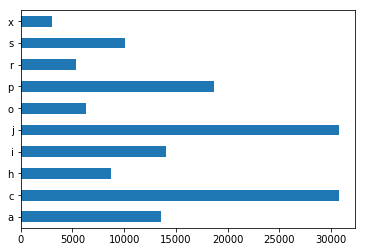

In [14]:
df_1.Tag.value_counts().sort_index().plot.barh()

In [15]:
%matplotlib inline

#### BinaryEncoding

In [16]:
import category_encoders as ce

bin_enc = ce.BinaryEncoder(drop_invariant=1)

In [17]:
bin_enc.fit(df_1[["Tag"]])

BinaryEncoder(cols=['Tag'], drop_invariant=1, handle_unknown='impute',
       impute_missing=True, return_df=True, verbose=0)

In [18]:
bin_t =bin_enc.transform(df_1[["Tag"]])

In [19]:
bin_t

,Tag_1,Tag_2,Tag_3,Tag_4
0,0,0,0,1
1,0,0,1,0
2,0,0,1,1
3,0,0,1,1
4,0,0,1,1
5,0,0,1,0
6,0,1,0,0
7,0,0,1,0
8,0,1,0,1
9,0,1,1,0


In [20]:
df_1=df_1.drop(columns=["Tag"])

#### RobustScaling

In [21]:
## RobustScaler scales according to the quantile ranges instead of Maximum

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(with_scaling="True")

In [22]:
cols=list(df_1)

In [23]:
cols

['Reputation', 'Answers', 'Username', 'Views']

In [24]:
df_r = scaler.fit_transform(df_1)

df_r = pd.DataFrame(df_r, columns=cols)

In [25]:
df_treated = pd.concat([df_r, bin_t], axis=1)

In [26]:
df_treated

,Reputation,Answers,Username,Views,Tag_1,Tag_2,Tag_3,Tag_4
0,0.909655,0.000000,-0.343522,0.993509,0,0,0,1
1,4.810006,1.000000,-0.501799,-0.256221,0,0,1,0
2,-0.065743,-0.666667,0.689614,0.499974,0,0,1,1
3,-0.253049,1.000000,1.076609,0.391735,0,0,1,1
4,0.667769,2.333333,-0.308711,1.979513,0,0,1,1
5,0.414927,-0.666667,0.443246,-0.273571,0,0,1,0
6,-0.079802,-0.666667,0.116684,-0.101307,0,1,0,0
7,-0.098201,0.333333,-0.052566,2.001456,0,0,1,0
8,1.546827,-0.333333,-0.499126,-0.185306,0,1,0,1
9,-0.222245,0.333333,1.025489,-0.167260,0,1,1,0


In [31]:
import pickle
filename = "final_model_ab.pkl" 
loaded_model = pickle.load(open(filename, 'rb'))

In [32]:
result = loaded_model.predict(df_treated)

In [34]:
result.shape

(141448,)

In [35]:
df_treated.shape

(141448, 8)

In [58]:
df_submission = pd.DataFrame()

In [59]:
df_submission["ID"]=df["ID"]

In [60]:
df_submission["Upvotes"] = result

In [61]:
df_submission

,ID,Upvotes
0,366953,1.838384
1,71864,0.303030
2,141692,0.010101
3,316833,-0.202020
4,440445,3.848485
5,3514,-0.171717
6,331420,-0.151515
7,406540,0.363636
8,227379,0.191919
9,331687,-0.141414


In [44]:

filename = "final_model_ab_unscaled.pkl" 
loaded_model_un = pickle.load(open(filename, 'rb'))

result_un = loaded_model_un.predict(df_treated)

In [50]:
list(result_un)

[202.0,
 68.0,
 29.0,
 10.0,
 364.0,
 11.0,
 12.0,
 52.0,
 56.0,
 10.0,
 5.0,
 46.0,
 12.0,
 215.0,
 36.0,
 775.0,
 25.0,
 119.0,
 594.0,
 7.0,
 15.0,
 105.0,
 13.0,
 11.0,
 28.0,
 10.0,
 169.0,
 300.0,
 4.0,
 7.0,
 119.0,
 24.0,
 26.0,
 424.0,
 4.0,
 16.0,
 11.0,
 18.0,
 26.0,
 8.0,
 28.0,
 350.0,
 5.0,
 464.0,
 3.0,
 237.0,
 13.0,
 164.0,
 2.0,
 7.0,
 182.0,
 388.0,
 3.0,
 4.0,
 10.0,
 12.0,
 211.0,
 42.0,
 97.0,
 3.0,
 8.0,
 107.0,
 34.0,
 36.0,
 19.0,
 234.0,
 64.0,
 40.0,
 336.0,
 25.0,
 1354.0,
 11.0,
 6.0,
 8.0,
 2.0,
 66.0,
 75.0,
 5.0,
 7.0,
 9.0,
 225.0,
 7.0,
 11.0,
 14.0,
 38.0,
 3.0,
 4.0,
 15.0,
 229.0,
 7.0,
 714.0,
 6.0,
 26.0,
 25.0,
 29.0,
 284.0,
 27.0,
 85.0,
 17.0,
 3.0,
 5992.0,
 70.0,
 11246.0,
 22.0,
 282.0,
 15.0,
 12.0,
 21.0,
 6.0,
 21.0,
 102.0,
 4.0,
 8.0,
 9.0,
 237.0,
 52.0,
 6.0,
 203.0,
 2.0,
 38.0,
 26.0,
 7.0,
 43.0,
 23.0,
 2.0,
 813.0,
 74.0,
 3.0,
 601.0,
 7.0,
 7.0,
 6.0,
 5.0,
 7.0,
 181.0,
 12.0,
 5.0,
 4.0,
 522.0,
 8.0,
 10.0,
 8.0,
 8.0,
 85.

In [52]:
un_df_submission = pd.DataFrame()

un_df_submission["ID"]=df["ID"]

un_df_submission["Upvotes"] = result_un


In [56]:
un_df_submission.to_csv("submission.csv",index=False)

In [62]:
df_submission.to_csv("submission_Scaled.csv",index=False)